In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# ## Loading Data From CSV file

In [2]:
df = pd.read_csv("C:\\Users\\andre\\OneDrive\\Desktop\\cognify_internship\\cognify.csv")
df.head(3)

,Resturant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


# 

## Shape of the data 

## Task 1

# a -  Determine the top three most common cuisines in the dataset.

In [4]:
cuisines = df["Cuisines"]
cuisines_counts = cuisines.value_counts()
top_3 = cuisines_counts.head(3)
top_3

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

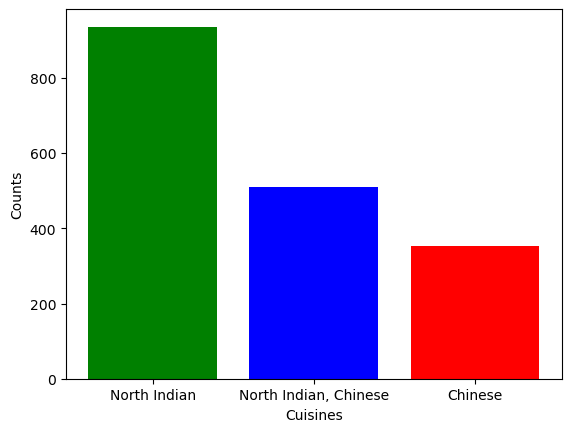

In [5]:
colors = ['green', 'blue', 'red'] 
plt.bar(top_3.index,top_3,color = colors)
plt.xlabel("Cuisines")
plt.ylabel("Counts")
plt.show()

In [6]:
print(top_3,"are the top three common cuisines")

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64 are the top three common cuisines


# 

## b -  Calculate the percentage of restaurants that serve each of the top cuisines.

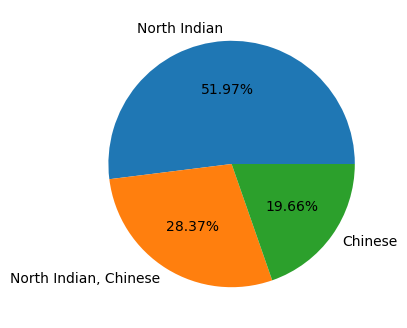

In [8]:
top_3 = cuisines_counts.head(3)
total = len(df)
percent = (top_3 / total)*100

plt.figure(figsize = (6,4))
plt.pie(top_3,labels = top_3.index,autopct = "%1.2f%%")
plt.show()

# 

# Task 2

# a - Identify the city with the highest number of restaurants in the dataset.

In [9]:
city_res = df.groupby("City")["Resturant ID"].count()
city_highest_res = city_res.idxmax()

In [10]:
city_highest_res

'New Delhi'

In [11]:
no_of_res = city_res.max()

In [13]:
print("The city with highest resturant is",city_highest_res,"which has totally",no_of_res,"resturants.")

The city with highest resturant is New Delhi which has totally 5473 resturants.


# 

## b - Calculate the average rating for restaurants in each city.

In [14]:
avg_res_rating = df.groupby("City")["Aggregate rating"].mean()
avg_res_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

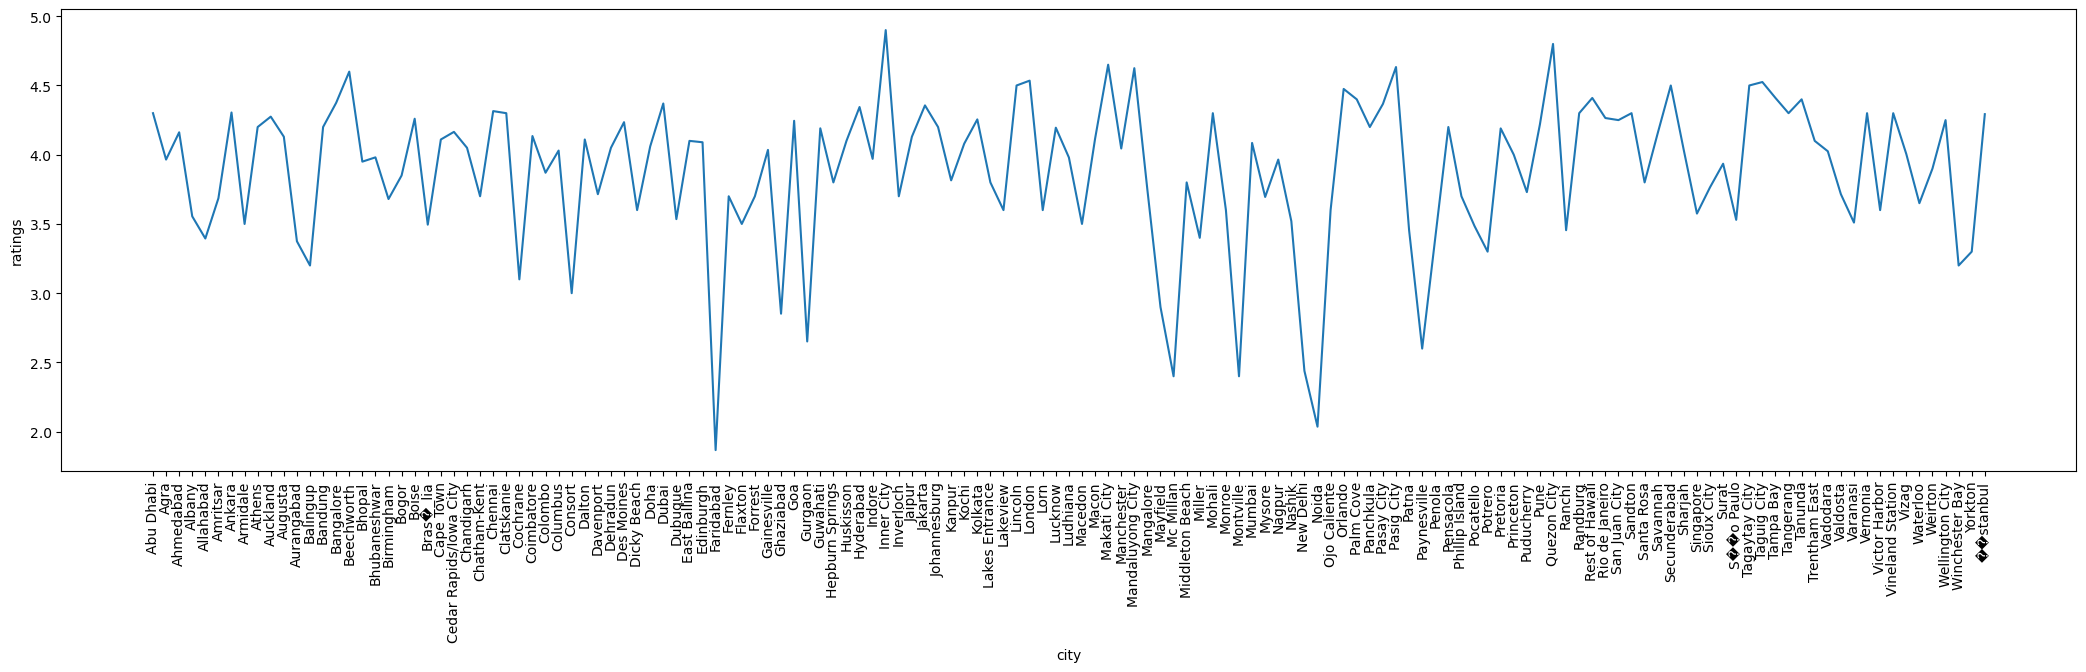

In [15]:
plt.figure(figsize=(26,6))
plt.plot(avg_res_rating.index,avg_res_rating)
plt.xticks(rotation=90)
plt.xlabel("city")
plt.ylabel("ratings")
plt.show()

# 

## c - Determine the city with the highest average rating.

In [17]:
max_rating_city = avg_res_rating.idxmax()
print("the City with highest average rating :",max_rating_city)

the City with highest average rating : Inner City


# Task 3

# a - Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants

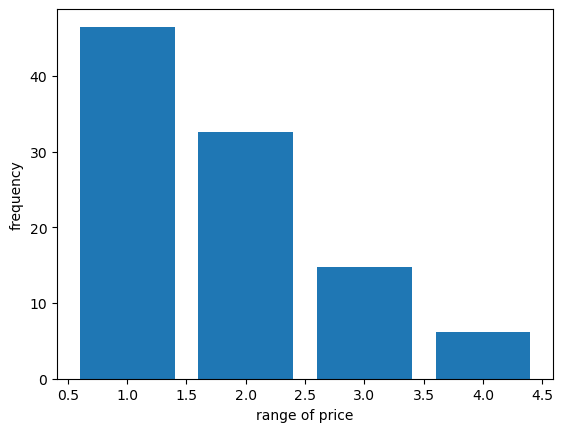

In [19]:
data_ra = df["Price range"].value_counts().sort_index()
total_res = len(df)
per = (data_ra / total_res)*100

plt.bar(data_ra.index,per.values)
plt.xlabel("range of price")
plt.ylabel("frequency")
plt.show()

# b - Calculate the percentage of restaurants in each price range category.


In [20]:
data_ra = df["Price range"].value_counts().sort_index()
total_res = len(df)
per = (data_ra / total_res)*100
print("the percentage of restaurants in each price range category:")
print(per)

the percentage of restaurants in each price range category:
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64


# 

# Task 4

# a - Determine the percentage of restaurants that offer online delivery.

In [21]:
online = df["Has Online delivery"].value_counts().get("Yes")
no_of_res = len(df)
per = (online/no_of_res)*100
print(round(per,2),"percentage of restaurants that offer online delivery.")

25.66 percentage of restaurants that offer online delivery.


# 

# b -  Compare the average ratings of restaurants with and without online delivery.

In [22]:
with_online = df[df["Has Online delivery"] == "Yes"]["Aggregate rating"].mean()
without_online = df[df["Has Online delivery"] == "No"]["Aggregate rating"].mean()

In [23]:
print("the average ratings of restaurants with online delivery is :",round(with_online,2))
print("the average ratings of restaurants with online delivery is :",round(without_online,2))

the average ratings of restaurants with online delivery is : 3.25
the average ratings of restaurants with online delivery is : 2.47
